# Sales Data Analysis Project with Tableau

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings("ignore")

In [2]:

# 1. Capture the dictionary of DataFrames
data = pd.read_excel("./AmazingMartEU2.xlsx", sheet_name=['ListOfOrders','OrderBreakdown','SalesTargets'])

# 2. Assign the DataFrames to specific variables
df_orders = data['ListOfOrders']
df_breakdown = data['OrderBreakdown']
df_targets = data['SalesTargets']
dfs=[df_orders,df_breakdown,df_targets]


In [3]:
print(dfs[0].isna().sum())
print("Number of duplication: ",df_orders.duplicated().sum())


Order ID         0
Order Date       0
Customer Name    0
City             0
Country          0
Region           0
Segment          0
Ship Date        0
Ship Mode        0
State            0
dtype: int64
Number of duplication:  0


In [4]:
print(df_breakdown.isna().sum())
print("Number of duplication: ",df_breakdown.duplicated().sum())


Order ID        0
Product Name    0
Discount        0
Sales           0
Profit          0
Quantity        0
Category        0
Sub-Category    0
dtype: int64
Number of duplication:  2


In [5]:
df_breakdown.drop_duplicates(inplace=True)

In [6]:
print(df_targets.isna().sum())
print("Number of duplication: ",df_targets.duplicated().sum())


Month of Order Date    0
Category               0
Target                 0
dtype: int64
Number of duplication:  0


In [7]:
df_targets.head(10)

,Month of Order Date,Category,Target
0,2011-01-01,Furniture,10000
1,2011-02-01,Furniture,10100
2,2011-03-01,Furniture,10300
3,2011-04-01,Furniture,10400
4,2011-05-01,Furniture,10500
5,2011-06-01,Furniture,10600
6,2011-07-01,Furniture,10800
7,2011-08-01,Furniture,10900
8,2011-09-01,Furniture,11000
9,2011-10-01,Furniture,11100


In [8]:
[print(df.info()) for df in dfs]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4117 entries, 0 to 4116
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order ID       4117 non-null   object        
 1   Order Date     4117 non-null   datetime64[ns]
 2   Customer Name  4117 non-null   object        
 3   City           4117 non-null   object        
 4   Country        4117 non-null   object        
 5   Region         4117 non-null   object        
 6   Segment        4117 non-null   object        
 7   Ship Date      4117 non-null   datetime64[ns]
 8   Ship Mode      4117 non-null   object        
 9   State          4117 non-null   object        
dtypes: datetime64[ns](2), object(8)
memory usage: 321.8+ KB
None
<class 'pandas.core.frame.DataFrame'>
Index: 8045 entries, 0 to 8046
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Order ID      8045 non-

[None, None, None]

In [9]:
# OrderBreakdown
df = df_orders.merge(df_breakdown, on='Order ID', how='inner')

In [45]:
df.columns.tolist()

['Order ID',
 'Order Date',
 'Customer Name',
 'City',
 'Country',
 'Region',
 'Segment',
 'Ship Date',
 'Ship Mode',
 'State',
 'Product Name',
 'Discount',
 'Sales',
 'Profit',
 'Quantity',
 'Category',
 'Sub-Category',
 'Shipping_period_days',
 'product_description',
 'price_after_dis',
 'original_price',
 'Profit_clipped']

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8045 entries, 0 to 8044
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order ID       8045 non-null   object        
 1   Order Date     8045 non-null   datetime64[ns]
 2   Customer Name  8045 non-null   object        
 3   City           8045 non-null   object        
 4   Country        8045 non-null   object        
 5   Region         8045 non-null   object        
 6   Segment        8045 non-null   object        
 7   Ship Date      8045 non-null   datetime64[ns]
 8   Ship Mode      8045 non-null   object        
 9   State          8045 non-null   object        
 10  Product Name   8045 non-null   object        
 11  Discount       8045 non-null   float64       
 12  Sales          8045 non-null   int64         
 13  Profit         8045 non-null   int64         
 14  Quantity       8045 non-null   int64         
 15  Category       8045 n

In [12]:
df.duplicated().sum()

np.int64(0)

In [13]:
df.describe().T.round(2)[2:]

,count,mean,min,25%,50%,75%,max,std
Discount,8045.0,0.110075,0.0,0.0,0.0,0.1,0.85,0.181787
Sales,8045.0,291.90317,3.0,48.0,117.0,313.0,6517.0,485.258616
Profit,8045.0,35.202237,-3060.0,1.0,14.0,47.0,2476.0,178.147747
Quantity,8045.0,3.772281,1.0,2.0,3.0,5.0,14.0,2.20361


In [14]:
df['Order Date'].dt.year.value_counts()

Order Date
2014    2613
2013    2100
2012    1870
2011    1462
Name: count, dtype: int64

In [15]:
df['Ship Date'].dt.year.value_counts()

Ship Date
2014    2602
2013    2100
2012    1865
2011    1437
2015      41
Name: count, dtype: int64

In [16]:
df[(df['Ship Date'].dt.year==2015) ]['Ship Date'].dt.day.value_counts()

Ship Date
1    14
2    12
5     6
4     5
3     4
Name: count, dtype: int64

# Shipping Period Analysis by Ship Mode

In [17]:
df['Shipping_period_days'] = (df['Ship Date'] - df['Order Date']).dt.days

In [18]:
np.sort(df['Shipping_period_days'].unique()).tolist()

[0, 1, 2, 3, 4, 5, 6, 7]

In [19]:
df[df['Shipping_period_days']==0]['Ship Mode'].value_counts()

Ship Mode
Immediate    406
Name: count, dtype: int64

In [20]:
df['Ship Mode'].value_counts()

Ship Mode
Economy         4860
Economy Plus    1590
Priority        1169
Immediate        426
Name: count, dtype: int64

In [21]:
df.groupby('Ship Mode')['Shipping_period_days'].value_counts()#.plot(kind='bar', figsize=(10,5))

Ship Mode     Shipping_period_days
Economy       4                       1948
              5                       1375
              6                        985
              7                        552
Economy Plus  2                        627
              5                        352
              3                        312
              4                        299
Immediate     0                        406
              1                         20
Priority      3                        505
              2                        447
              1                        217
Name: count, dtype: int64

| Ship Mode    | Shipping Days | Count            |no. Customers|
| ------------ | ------------- | ---------------- |-------------|
| Immediate    | 0–1 days      | small volume     |4860|
| Priority     | 1–3 days      | medium volume    |1590|
| Economy Plus | 2–5 days      | medium volume    |1169|
| Economy      | 4–7 days      | very high volume |426|

> show customers mostly choose the cheapest option, even if it’s slow.


In [22]:
# Prepare the data (you already have shippingPeriodByMode)
shippingPeriodByMode = (
    df.groupby('Shipping_period_days')['Ship Mode']
      .value_counts()
      .reset_index(name='count')
)

fig = px.bar(
    shippingPeriodByMode,
    x='Shipping_period_days',
    y='count',
    color='Ship Mode',
    barmode='group',   # similar to hue in seaborn
    labels={
        'Shipping_period_days': 'Shipping Period (Days)',
        'count': 'Count',
        'Ship Mode': 'Ship Mode'
    },
    title='Ship Mode Count by Shipping Period (Days)'
)

fig.show()


### Business impact of shipping period analysis:

- Demand is high because of low cost.

- But slow delivery may reduce satisfaction if expectations are not managed.

- Potential to offer "Economy Upgrade" for slightly faster shipping (upsell).

## number of unique customers and products

In [23]:
print("number of unique customers: ",df['Customer Name'].nunique()) # number of unique customers
print("number of unique products: ",df['Product Name'].nunique()) # number of unique products
print("number of unique orders: ",df['Order ID'].nunique()) # number of unique orders


number of unique customers:  792
number of unique products:  1810
number of unique orders:  4117


In [24]:
# Number of products per order
df.groupby('Order ID')['Product Name'].nunique().reset_index(name='num_products')['num_products'].value_counts().sort_index()   

num_products
1     2107
2     1029
3      510
4      232
5      125
6       55
7       29
8       15
9       10
10       4
11       1
Name: count, dtype: int64

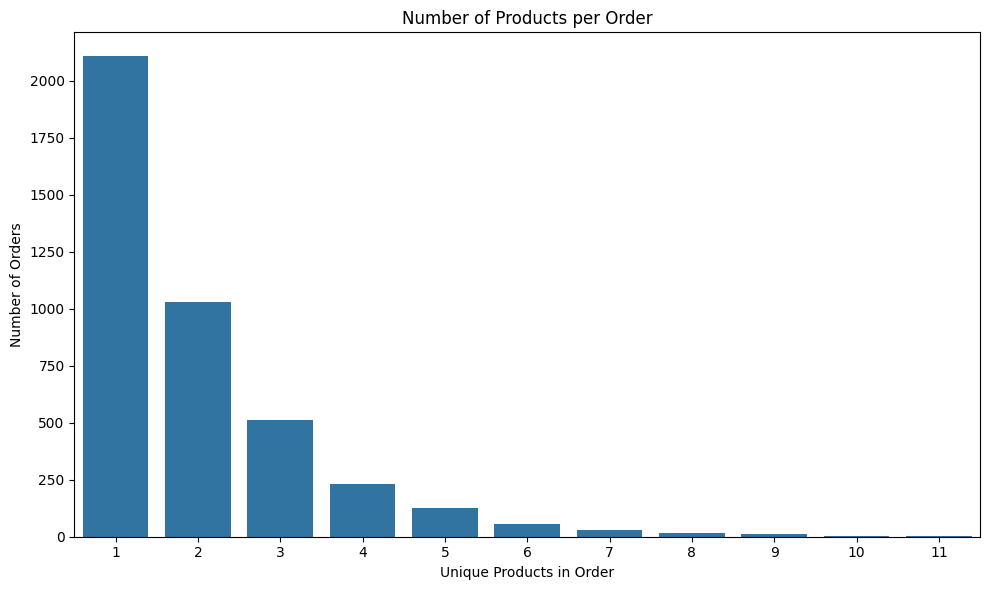

In [25]:
# Calculate number of unique products per order
order_products = (
    df.groupby('Order ID')['Product Name']
      .nunique()
      .reset_index(name='num_products')
)

# Count frequency of each number of products
freq = order_products['num_products'].value_counts().sort_index()

# Convert to DataFrame for seaborn
freq_df = freq.reset_index()
freq_df.columns = ['num_products', 'count']

# Plot
plt.figure(figsize=(10,6))
sns.barplot(data=freq_df, x='num_products', y='count')

plt.title('Number of Products per Order')
plt.xlabel('Unique Products in Order')
plt.ylabel('Number of Orders')
plt.tight_layout()
plt.show()


In [26]:
# the most sold products
df.groupby('Product Name')['Quantity'].sum().sort_values(ascending=False).head(20)

Product Name
Rogers File Cart, Single Width           108
Eldon File Cart, Single Width            104
Binney & Smith Sketch Pad, Blue           90
Stanley Pencil Sharpener, Water Color     89
Avery Index Tab, Clear                    81
Boston Pencil Sharpener, Water Color      80
Tenex File Cart, Single Width             78
Sanford Markers, Water Color              75
Boston Canvas, Fluorescent                73
Ibico Index Tab, Clear                    72
Sanford Pencil Sharpener, Easy-Erase      69
Sanford Pencil Sharpener, Water Color     69
BIC Markers, Easy-Erase                   68
Fellowes Box, Industrial                  67
Binney & Smith Pens, Blue                 66
Cardinal Binding Machine, Economy         65
Stanley Markers, Water Color              65
Rogers Shelving, Wire Frame               64
Avery Binder, Clear                       62
Cardinal Binding Machine, Clear           62
Name: Quantity, dtype: int64

In [27]:
# check if all product name contain comma 
df['Product Name'].str.contains(',').all()

np.True_

In [28]:
df['product_description'] = df['Product Name'].str.split(',', expand=True)[1].str.strip()
df['Product Name']=df['Product Name'].str.split(',', expand=True)[0].str.strip()

In [29]:
df.isna().values.sum()

np.int64(0)

In [30]:
df['product_description'].nunique()

55

In [31]:
df[df['Category']=='Technology']['product_description'].value_counts()

product_description
Full Size         122
with Caller ID    117
Cordless          116
Erganomic         109
Laser             102
VoIP               98
Durable            96
Bluetooth          95
White              95
Color              94
Digital            88
USB                86
High-Speed         83
Wireless           80
Programmable       78
Red                64
Name: count, dtype: int64

In [32]:
df.Category.value_counts()

Category
Office Supplies    5284
Technology         1523
Furniture          1238
Name: count, dtype: int64

In [33]:
df['price_after_dis']= (df['Sales'] / df['Quantity']).round(2)
df['original_price'] = (df['price_after_dis'] / (1 - df['Discount'])).round(2)

In [34]:
df[["Product Name","Quantity","original_price","price_after_dis","Sales","Discount","Profit"]]

,Product Name,Quantity,original_price,price_after_dis,Sales,Discount,Profit
0,Enermax Note Cards,3,30.00,15.00,45,0.5,-26
1,Dania Corner Shelving,7,122.00,122.00,854,0.0,290
2,Binney & Smith Sketch Pad,3,46.67,46.67,140,0.0,21
3,Boston Markers,2,27.00,13.50,27,0.5,-22
4,Eldon Folders,2,17.00,8.50,17,0.5,-1
...,...,...,...,...,...,...,...
8040,Fellowes Shelving,5,57.80,57.80,289,0.0,75
8041,Wilson Jones Index Tab,5,6.40,6.40,32,0.0,8
8042,BIC Pencil Sharpener,2,30.00,15.00,30,0.5,-10
8043,Avery Binder Covers,4,11.50,5.75,23,0.5,-6


In [35]:
# is all profit is negative when there is a discount?
df[df['Discount']>0]['Profit'].describe()

count    3138.000000
mean       -9.537604
std       209.085935
min     -3060.000000
25%       -36.000000
50%        -4.000000
75%        30.000000
max      1868.000000
Name: Profit, dtype: float64

In [36]:
df[df.Profit < -2000].shape

(2, 21)

Text(0.5, 1.0, 'Profit Distribution')

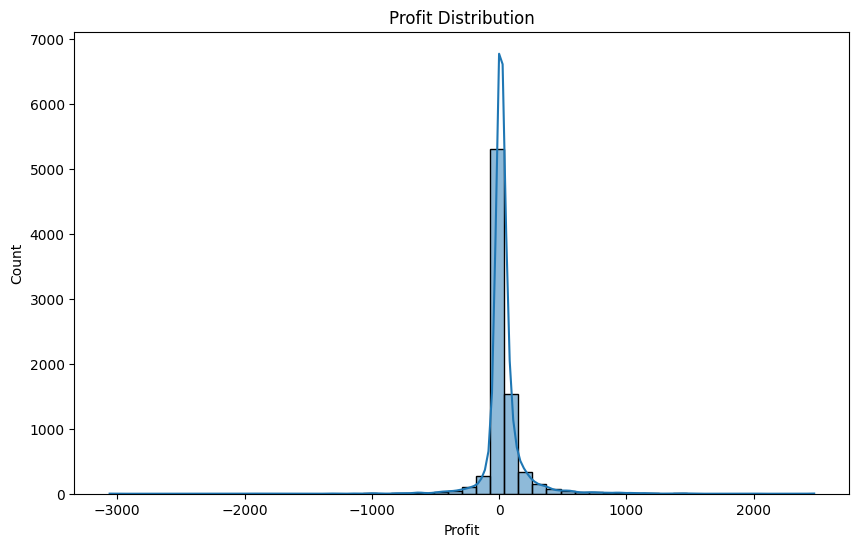

In [37]:
# profit histogram
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='Profit', bins=50, kde=True)
plt.title('Profit Distribution')

<Axes: xlabel='Profit'>

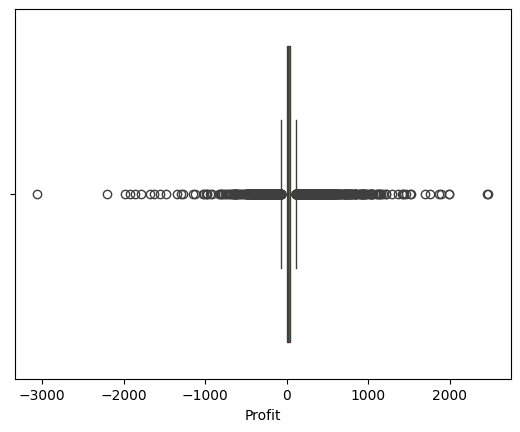

In [38]:
sns.boxplot(x='Profit', data=df)

In [39]:
df['Profit'].describe().round(2) , df['Profit'].quantile([0.01,0.05,0.95,0.99])

(count    8045.00
 mean       35.20
 std       178.15
 min     -3060.00
 25%         1.00
 50%        14.00
 75%        47.00
 max      2476.00
 Name: Profit, dtype: float64,
 0.01   -398.0
 0.05    -93.0
 0.95    241.0
 0.99    701.0
 Name: Profit, dtype: float64)

In [40]:
# clip extreme profit values
# thresholds
lower_clip = df['Profit'].quantile(0.01)  # -398
upper_clip = df['Profit'].quantile(0.99)  # 701

df['Profit_clipped'] = df['Profit'].clip(lower=lower_clip, upper=upper_clip)

# Check extreme counts after clipping
print(df[df['Profit']>701].shape, df[df['Profit']<-398].shape)
print(df[df['Profit_clipped']>701].shape, df[df['Profit_clipped']<-398].shape)


(80, 22) (80, 22)
(0, 22) (0, 22)


Text(0.5, 1.0, 'Profit Distribution')

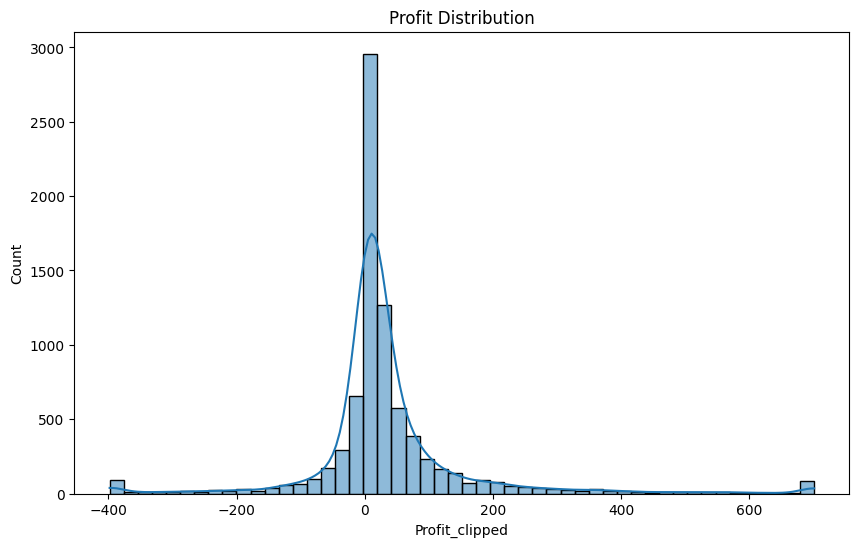

In [41]:
# profit histogram
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='Profit_clipped', bins=50, kde=True)
plt.title('Profit Distribution')

<Axes: xlabel='Profit_clipped'>

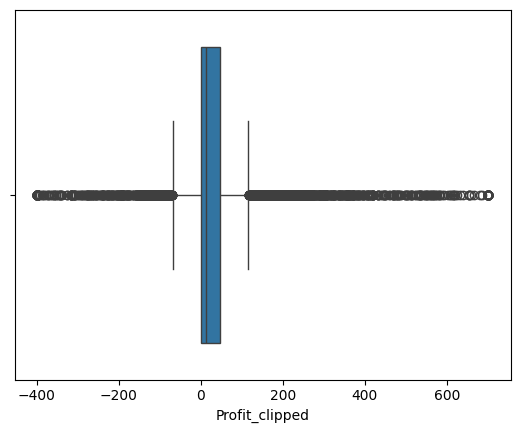

In [42]:
sns.boxplot(x='Profit_clipped', data=df)

In [43]:
# how many order are breaking even (zero profit)? and loss-making orders?and revenue-generating orders?
df_orders_profit = df.groupby('Order ID')['Profit'].sum().reset_index(name='total_profit')
df_orders_profit['profit_category'] = np.where(df_orders_profit['total_profit'] > 0, 'Revenue-Generating',
                                              np.where(df_orders_profit['total_profit'] < 0, 'Loss-Making', 'Breaking Even'))
df_orders_profit['profit_category'].value_counts()



profit_category
Revenue-Generating    3164
Loss-Making            893
Breaking Even           60
Name: count, dtype: int64

<Axes: title={'center': 'Total Sales by Year'}, xlabel='Order Date'>

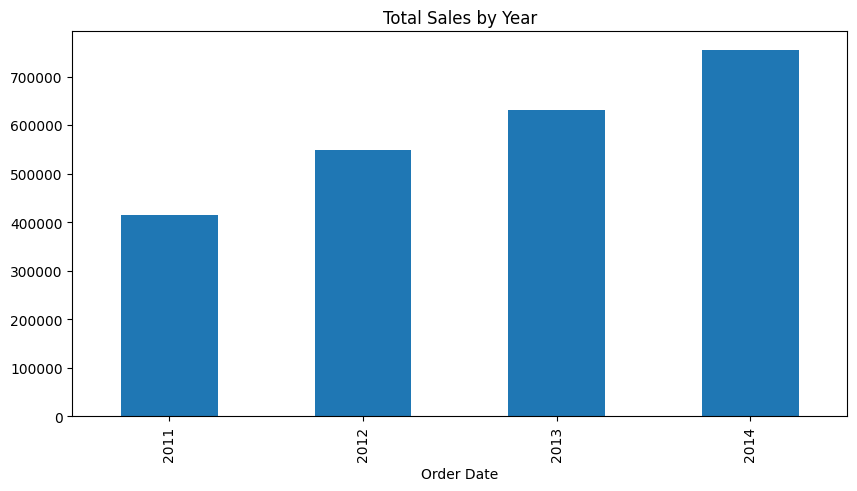

In [44]:
df.groupby(df['Order Date'].dt.year)['Sales'].sum().plot(kind='bar', figsize=(10,5), title='Total Sales by Year')